In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
a, b = -1, 2
x_input = np.linspace(0,20)
y_output = a*x_input + b 

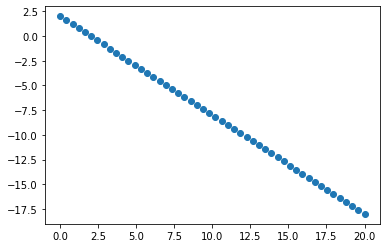

In [3]:
plt.scatter(x_input, y_output)
plt.show()

In [4]:
def RMSprop_GD(x_input_fun, y_output_fun, learing_rate, beta_f, max_iter):
    m = len(x_input_fun)
    epsilon = 1e-6
    theta_0, theta_1, cost = 0, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        
        #RMSprop update
        v_new_0 = beta_f*v_old_0 + (1-beta_f)*(gradients[0] ** 2)
        v_new_1 = beta_f*v_old_1 + (1-beta_f)*(gradients[1] ** 2)
        theta_0 = theta_0 - (learing_rate/(math.sqrt(v_new_0) + epsilon))*gradients[0]
        theta_1 = theta_1 - (learing_rate/(math.sqrt(v_new_1) + epsilon))*gradients[1]
        v_old_0 = v_new_1
        v_old_1 = v_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, costs

In [5]:
iteration = 200
alpha = 0.01
beta = 0.7
thetas_0, thetas_1, costs = RMSprop_GD(x_input, y_output, alpha, beta, iteration)

In [6]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  0.68719932,   0.31687342,  -0.05345247,  -0.42377836,
        -0.79410426,  -1.16443015,  -1.53475605,  -1.90508194,
        -2.27540783,  -2.64573373,  -3.01605962,  -3.38638551,
        -3.75671141,  -4.1270373 ,  -4.49736319,  -4.86768909,
        -5.23801498,  -5.60834087,  -5.97866677,  -6.34899266,
        -6.71931856,  -7.08964445,  -7.45997034,  -7.83029624,
        -8.20062213,  -8.57094802,  -8.94127392,  -9.31159981,
        -9.6819257 , -10.0522516 , -10.42257749, -10.79290339,
       -11.16322928, -11.53355517, -11.90388107, -12.27420696,
       -12.64453285, -13.01485875, -13.38518464, -13.75551053,
       -14.12583643, -14.49616232, -14.86648821, -15.23681411,
       -15.60714   , -15.9774659 , -16.34779179, -16.71811768,
       -17.08844358, -17.45876947])

In [7]:
r2_score(y_output, y_predicated)

0.9871166111473624

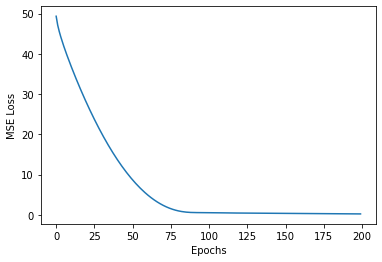

In [8]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

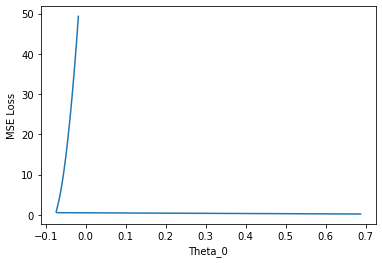

In [9]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

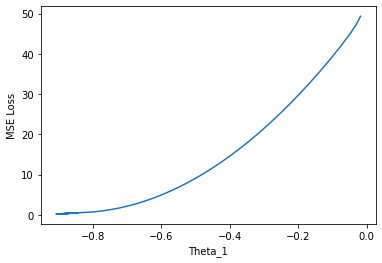

In [10]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

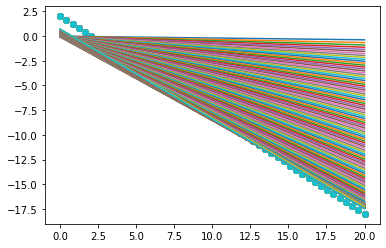

In [11]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

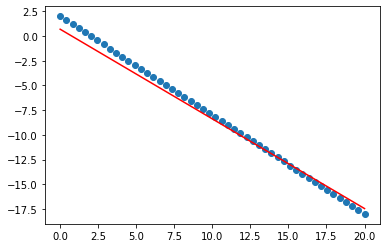

In [12]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')